# Visualizing data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk import FreqDist

In [4]:
url = "https://raw.githubusercontent.com/CaptSolo/BSSDH_2023_beginners/main/corpora/en_old_newspapers_5k.tsv"
df = pd.read_csv(url, sep="\t")

In [5]:
# https://dariuslfuller.medium.com/creating-visuals-with-nltks-freqdist-ac4e667e49f3

all_text = "\n".join(df["Text"]).split()
all_fdist = FreqDist(all_text).most_common(20)

In [6]:
all_fdist

[('the', 8379),
 ('to', 4422),
 ('and', 4137),
 ('a', 4102),
 ('of', 3886),
 ('in', 3052),
 ('for', 1733),
 ('that', 1490),
 ('is', 1462),
 ('on', 1261),
 ('with', 1204),
 ('The', 1132),
 ('was', 1082),
 ('at', 942),
 ('as', 811),
 ('he', 797),
 ('it', 761),
 ('from', 750),
 ('are', 716),
 ('be', 713)]

In [8]:
# converting data to Pandas series
all_fdist = pd.Series(dict(all_fdist))

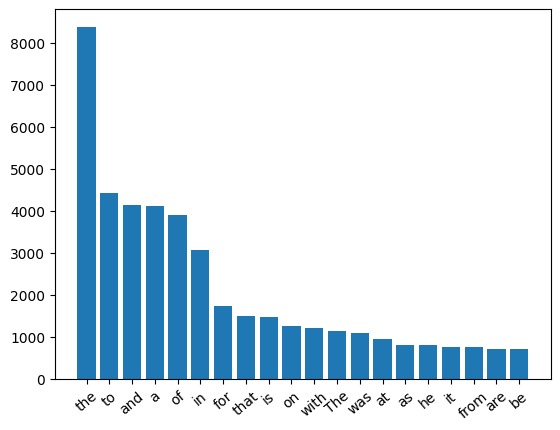

In [14]:
## Matplotlib plot using Pandas attributes + xtick rotation for ease of viewing

#all_plot = plt.bar(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot = plt.bar(all_fdist.index, all_fdist.values)
ticks = plt.xticks(rotation=40)

### Stopword removal

For widely used languages such as English we can use NLTK's stopword list.

In [22]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [23]:
# let's convert the list to a set (with more efficient work lookup operations)
stopword_set = set(stopwords)

In [30]:
# removing stopwords
all_text_stopped = [word for word in all_text if word.lower() not in stopword_set]

# let's also remove some special symbols
spec_chars = ['--', '—', '-']
all_text_stopped = [word for word in all_text_stopped if word not in spec_chars]

all_text_stopped[:6]

['home', 'alone,', 'apparently.', 'St.', 'Louis', 'plant']

In [32]:
# let's draw freq distribution again

all_fdist_stopped = FreqDist(all_text_stopped).most_common(20)
all_fdist_stopped = pd.Series(dict(all_fdist_stopped))

for line in all_fdist_stopped.keys():
    print(line, ":\t", all_fdist_stopped[line])

said :	 682
said. :	 462
one :	 335
would :	 323
two :	 281
also :	 261
like :	 228
last :	 219
first :	 207
get :	 201
could :	 201
people :	 183
new :	 182
going :	 173
time :	 165
many :	 153
years :	 151
year :	 150
three :	 145
state :	 144


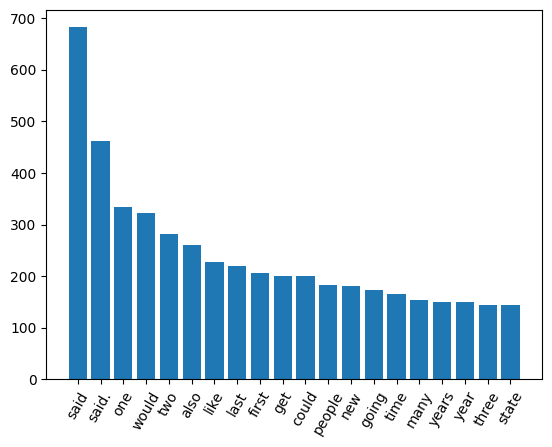

In [36]:
all_plot = plt.bar(all_fdist_stopped.index, all_fdist_stopped.values)
ticks = plt.xticks(rotation=60)

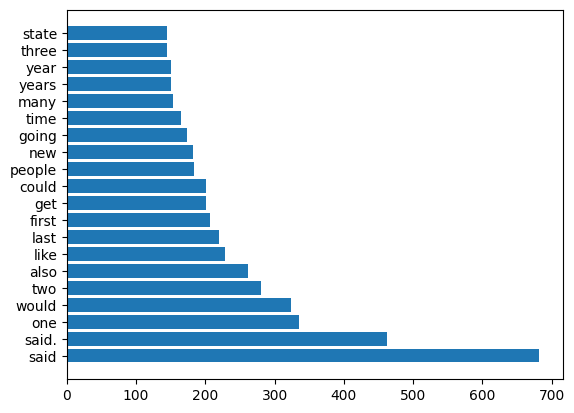

In [41]:
all_plot = plt.barh(all_fdist_stopped.index, all_fdist_stopped.values)

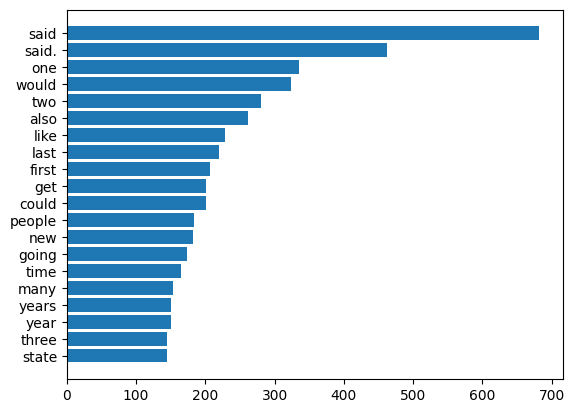

In [43]:
all_plot = plt.barh(all_fdist_stopped.index, all_fdist_stopped.values)
ax = plt.gca()
ax.invert_yaxis()

### Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

https://seaborn.pydata.org/

In [46]:
data = FreqDist(all_text_stopped).most_common(20)
data = pd.DataFrame(data, columns = ["Word","Frequency"])

data[:10]

,Word,Frequency
0,said,682
1,said.,462
2,one,335
3,would,323
4,two,281
5,also,261
6,like,228
7,last,219
8,first,207
9,get,201


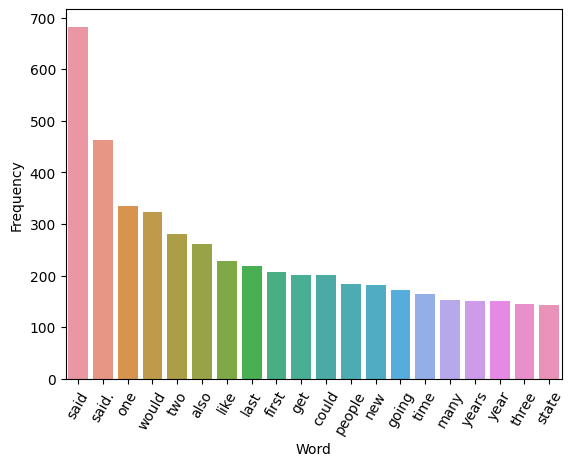

In [47]:
ax = sns.barplot(data, x="Word", y="Frequency")

ax = ax.set_xticklabels(data["Word"], rotation=60)

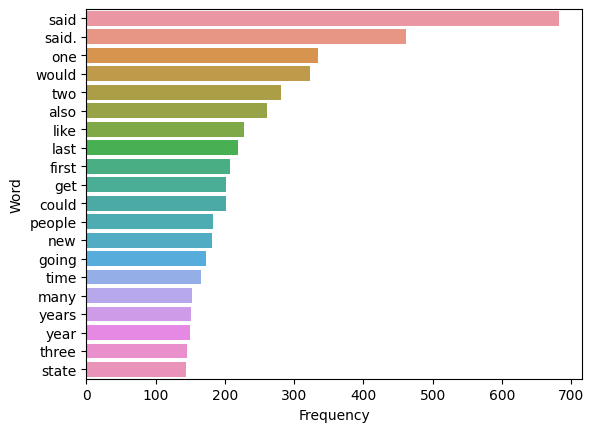

In [49]:
ax = sns.barplot(data, y="Word", x="Frequency", orient="h")

More information about Seaborn:
* https://seaborn.pydata.org/tutorial/introduction.html

### Stopwords for languages not included in NLTK

Previously we used stopwords from NLTK stopword list but that won't work for Latvian or other languages not included in NLTK.

Let's use an existing Latvian stopword list from Github:

In [51]:
import requests

stop_url = "https://raw.githubusercontent.com/Xangis/extra-stopwords/master/latvian"
res = requests.get(stop_url)

stopwords = res.text.split()
print(stopwords[:10])

stopword_set = set(stopwords)

['aiz', 'ap', 'ar', 'apakš', 'ārpus', 'augšpus', 'bez', 'caur', 'dēļ', 'gar']


In [54]:
# reading our text corpus

url_2 = "https://raw.githubusercontent.com/CaptSolo/BSSDH_2023_beginners/main/corpora/lv_old_newspapers_5k.tsv"
df_2 = pd.read_csv(url, sep="\t")

In [55]:
all_text = "\n".join(df_2["Text"]).split()
all_fdist = FreqDist(all_text).most_common(20)

In [58]:
# converting data to Pandas series
all_fdist = pd.Series(dict(all_fdist))

In [61]:
# removing stopwords
all_text_stopped = [word for word in all_text if word not in stopword_set]

# removing special characters
spec_chars = ['-', '–', '—']
all_text_stopped = [word for word in all_text_stopped if word not in spec_chars]

all_text_stopped[:6]

['"Viņa', 'pirmsnāves', 'zīmītē', 'rakstīts', 'vienīgi', 'smēķēšanas']

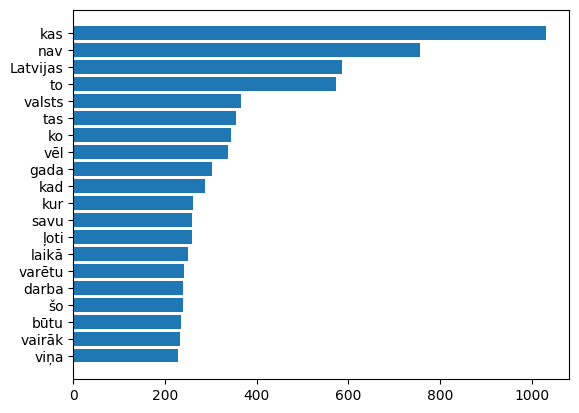

In [65]:
# draw freq distribution

all_fdist_stopped = FreqDist(all_text_stopped).most_common(20)
all_fdist_stopped = pd.Series(dict(all_fdist_stopped))

all_plot = plt.barh(all_fdist_stopped.index, all_fdist_stopped.values)
ax = plt.gca()
ax.invert_yaxis()

ToDo:

* add collocations
* add WordCloud